PRIORIZACIÓN DE APOYOS CON EL MODELO DE ENTRENAMIENTO DE ÁRBOL DE DECISIÓN

In [50]:
#Importación de librerías
import pandas as pd

In [72]:
#Leer dataset de entrenamiento
df_apoyos= pd.read_csv('DATA_ENTRENAMIENTO_APOYOS.csv', encoding= 'unicode_escape')

1. Limpieza de datos

In [73]:
#Visualización de columnas
df_apoyos.info()
df_apoyos.columns 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ï»¿ID             414 non-null    float64
 1   APOYO_ALIMENTOS   319 non-null    float64
 2   SEXO              412 non-null    object 
 3   AÃO ACTUAL       414 non-null    object 
 4   AÃO              414 non-null    object 
 5   EDAD              414 non-null    float64
 6   ESTUDIOS          414 non-null    object 
 7   C.P               408 non-null    object 
dtypes: float64(3), object(5)
memory usage: 35.8+ KB


Index(['ï»¿ID', 'APOYO_ALIMENTOS ', 'SEXO ', 'AÃO ACTUAL', 'AÃO', 'EDAD',
       'ESTUDIOS ', 'C.P '],
      dtype='object')

In [75]:
df_apoyos

,ï»¿ID,APOYO_ALIMENTOS,SEXO,AÃO ACTUAL,AÃO,EDAD,ESTUDIOS,C.P
0,89.0,1.0,M,14/07/2022,1964,58.0,PRIMARIA,96410
1,318.0,0.0,M,14/07/2022,1997,25.0,PREPARATORIA,96510
2,787.0,1.0,F,14/07/2022,1972,50.0,SECUNDARIA,96430
3,319.0,1.0,M,14/07/2022,1957,65.0,PRIMARIA,96410
4,391.0,0.0,F,14/07/2022,1967,55.0,PREPARATORIA,96510
...,...,...,...,...,...,...,...,...
566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
#Eliminar columnas innecesarias
df_apoyos.drop(columns=['AÃO ACTUAL','AÃO'], inplace=True)

In [78]:
#Visualización de dataset final
df_apoyos

,ï»¿ID,APOYO_ALIMENTOS,SEXO,EDAD,ESTUDIOS,C.P
0,89.0,1.0,M,58.0,PRIMARIA,96410
1,318.0,0.0,M,25.0,PREPARATORIA,96510
2,787.0,1.0,F,50.0,SECUNDARIA,96430
3,319.0,1.0,M,65.0,PRIMARIA,96410
4,391.0,0.0,F,55.0,PREPARATORIA,96510
...,...,...,...,...,...,...
566,NaN,NaN,NaN,NaN,NaN,NaN
567,NaN,NaN,NaN,NaN,NaN,NaN
568,NaN,NaN,NaN,NaN,NaN,NaN
569,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
#Eliminación de filas sin datos
df_apoyos = df_apoyos.drop(range(292, 571),axis=0)

In [81]:
df_apoyos[['EDAD','APOYO_ALIMENTOS ']] = df_apoyos[['EDAD','APOYO_ALIMENTOS ']].astype(int)
df_apoyos

,ï»¿ID,APOYO_ALIMENTOS,SEXO,EDAD,ESTUDIOS,C.P
0,89.0,1,M,58,PRIMARIA,96410
1,318.0,0,M,25,PREPARATORIA,96510
2,787.0,1,F,50,SECUNDARIA,96430
3,319.0,1,M,65,PRIMARIA,96410
4,391.0,0,F,55,PREPARATORIA,96510
...,...,...,...,...,...,...
287,1401.0,1,M,38,SECUNDARIA,NaN
288,1402.0,1,F,74,SECUNDARIA,NaN
289,1403.0,1,F,41,SIN ESCOLARIDAD,NaN
290,850.0,1,F,59,SECUNDARIA,96535


In [82]:
#Conversión de valores string
df_apoyos = pd.get_dummies(data=df_apoyos, drop_first= True)
df_apoyos

,ï»¿ID,APOYO_ALIMENTOS,EDAD,SEXO _M,ESTUDIOS _INGENIERIA,ESTUDIOS _INGIENERIA,ESTUDIOS _LICENCIATURA,ESTUDIOS _PREPARATORIA,ESTUDIOS _PREPARATORIA,ESTUDIOS _PRIMARA,...,C.P _96518,C.P _96519,C.P _96520,C.P _96523,C.P _96529,C.P _96530,C.P _96535,C.P _96536,C.P _96538,C.P _96558
0,89.0,1,58,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,318.0,0,25,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,787.0,1,50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,319.0,1,65,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,391.0,0,55,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1401.0,1,38,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
288,1402.0,1,74,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289,1403.0,1,41,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
290,850.0,1,59,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


2. Seleccionar variables

In [83]:
#Renombre de columna debido a espacio e interpretación
df_apoyos =df_apoyos.rename(columns={'APOYO_ALIMENTOS ':'APOYO_PRIORITARIO'})
df_apoyos.columns

Index(['ï»¿ID', 'APOYO_PRIORITARIO', 'EDAD', 'SEXO _M',
       'ESTUDIOS _INGENIERIA ', 'ESTUDIOS _INGIENERIA',
       'ESTUDIOS _LICENCIATURA', 'ESTUDIOS _PREPARATORIA',
       'ESTUDIOS _PREPARATORIA ', 'ESTUDIOS _PRIMARA', 'ESTUDIOS _PRIMARIA',
       'ESTUDIOS _PRIMARIA ', 'ESTUDIOS _SECUDARIA ', 'ESTUDIOS _SECUNDARIA',
       'ESTUDIOS _SECUNDARIA ', 'ESTUDIOS _SIN ESCOLARIDAD',
       'ESTUDIOS _SIN ESCOLARIDAD ', 'ESTUDIOS _UNIVERDAD',
       'ESTUDIOS _UNIVERSIDAD', 'ESTUDIOS _UNIVERSIDAD ', 'C.P _96400',
       'C.P _96410', 'C.P _96420', 'C.P _96430', 'C.P _96440', 'C.P _96458',
       'C.P _96470', 'C.P _96480', 'C.P _96490', 'C.P _96500', 'C.P _96510',
       'C.P _96518', 'C.P _96519', 'C.P _96520', 'C.P _96523', 'C.P _96529',
       'C.P _96530', 'C.P _96535', 'C.P _96536', 'C.P _96538', 'C.P _96558'],
      dtype='object')

In [85]:
#Eliminación de columna para determinar solo las explicativas
explicativas = df_apoyos.drop(columns= ['APOYO_PRIORITARIO','ï»¿ID'], axis=1)

In [86]:
#Determinar columna que será objetivo del modelo
objetivo = df_apoyos.APOYO_PRIORITARIO

3. Entrenar el modelo

In [ ]:
pip install -U scikit-learn scipy matplotlib

In [88]:
from sklearn.tree import DecisionTreeClassifier 

In [89]:
model = DecisionTreeClassifier(max_depth=3)

In [90]:
model.fit(X= explicativas, y=objetivo)

DecisionTreeClassifier(max_depth=3)

4. Visualizar el modelo

In [91]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(0.5, 0.875, 'EDAD <= 48.5\ngini = 0.461\nsamples = 292\nvalue = [105, 187]'),
 Text(0.25, 0.625, 'ESTUDIOS _PRIMARIA <= 0.5\ngini = 0.477\nsamples = 117\nvalue = [71, 46]'),
 Text(0.125, 0.375, 'ESTUDIOS _SIN ESCOLARIDAD <= 0.5\ngini = 0.381\nsamples = 86\nvalue = [64, 22]'),
 Text(0.0625, 0.125, 'gini = 0.298\nsamples = 77\nvalue = [63, 14]'),
 Text(0.1875, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.375, 0.375, 'EDAD <= 29.0\ngini = 0.35\nsamples = 31\nvalue = [7, 24]'),
 Text(0.3125, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4375, 0.125, 'gini = 0.252\nsamples = 27\nvalue = [4, 23]'),
 Text(0.75, 0.625, 'ESTUDIOS _PREPARATORIA <= 0.5\ngini = 0.313\nsamples = 175\nvalue = [34, 141]'),
 Text(0.625, 0.375, 'ESTUDIOS _UNIVERSIDAD <= 0.5\ngini = 0.208\nsamples = 153\nvalue = [18, 135]'),
 Text(0.5625, 0.125, 'gini = 0.18\nsamples = 150\nvalue = [15, 135]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.875, 0.375, 'EDAD

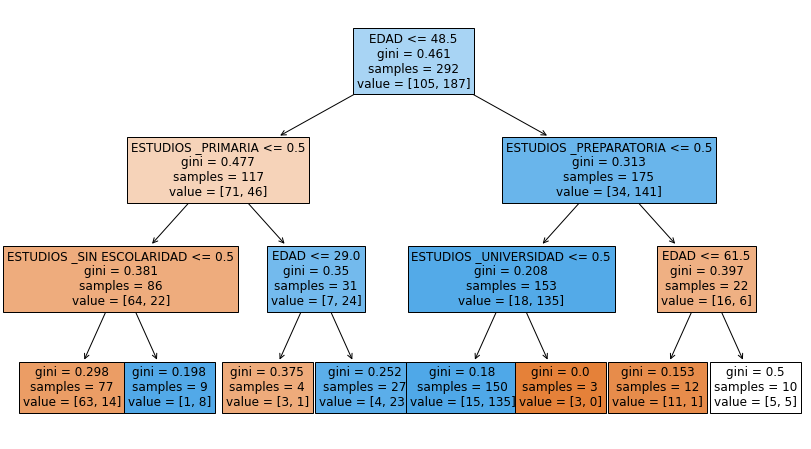

In [92]:
plt.figure(figsize=(14,8))
plot_tree(decision_tree=model, feature_names= explicativas.columns, filled= True, fontsize=12)

5. Prueba del modelo con una persona ejemplo

In [93]:
#Análisis del comportamiento de una persona
persona = explicativas.sample()
persona

,EDAD,SEXO _M,ESTUDIOS _INGENIERIA,ESTUDIOS _INGIENERIA,ESTUDIOS _LICENCIATURA,ESTUDIOS _PREPARATORIA,ESTUDIOS _PREPARATORIA,ESTUDIOS _PRIMARA,ESTUDIOS _PRIMARIA,ESTUDIOS _PRIMARIA,...,C.P _96518,C.P _96519,C.P _96520,C.P _96523,C.P _96529,C.P _96530,C.P _96535,C.P _96536,C.P _96538,C.P _96558
68,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
135/292

0.4623287671232877

In [95]:
model.predict_proba(persona)

array([[0.81818182, 0.18181818]])

In [96]:
y_pred= model.predict(explicativas)

6. Interpretar el modelo

In [97]:
import seaborn as sns

<AxesSubplot: xlabel='EDAD', ylabel='Count'>

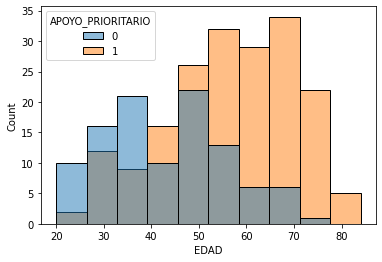

In [98]:
#Análisis del modelo con un histograma
sns.histplot(x=df_apoyos.EDAD, hue= df_apoyos.APOYO_PRIORITARIO)

In [99]:
#Verificación del modelo
df_apoyos['pred'] = y_pred

In [100]:
df_apoyos.sample(10)[['APOYO_PRIORITARIO','pred']]

,APOYO_PRIORITARIO,pred
34,1,1
276,1,1
110,1,1
272,0,0
193,1,1
108,0,0
48,0,0
118,0,0
160,0,0
171,1,1
